K-Nearest Neighbors (KNN)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Load the dataset
data = pd.read_csv(r'C:\Users\iness\OneDrive\Ambiente de Trabalho\FAA_1\diabetes.csv')

# Pre-processing
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

# Separate the independent (X) and dependent (y) variables
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Separation between training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Method 1: Basic KNN model (without adjustments)
knn_base = KNeighborsClassifier()
knn_base.fit(X_train, y_train)
y_pred_base = knn_base.predict(X_test)
accuracy_knn_base = accuracy_score(y_test, y_pred_base)

report_base = classification_report(y_test, y_pred_base, output_dict=True)

In [ ]:
# Method 2: Adjusting parameters (GridSearchCV)
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}  # Test different numbers of neighbors
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_knn = grid_search.best_estimator_
y_pred_optimized = best_knn.predict(X_test)
accuracy_knn_optimized = accuracy_score(y_test, y_pred_optimized)

report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

In [ ]:
# Method 3: Cross Validation
cv_results = cross_validate(knn_base, X, y, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

# Average cross-validation metrics
mean_accuracy_cv = np.mean(cv_results['test_accuracy'])
mean_precision_cv = np.mean(cv_results['test_precision'])
mean_recall_cv = np.mean(cv_results['test_recall'])
mean_f1_cv = np.mean(cv_results['test_f1'])

                    Modelo  Acurácia  Precision (Não-Diabetes)  \
0               KNN (Base)  0.675325                  0.769231   
1          KNN (Otimizado)  0.675325                  0.775281   
2  KNN (Validação Cruzada)  0.722689                  0.609803   

   Recall (Não-Diabetes)  F1-Score (Não-Diabetes)  Precision (Diabetes)  \
0               0.707071                 0.736842              0.539683   
1               0.696970                 0.734043              0.538462   
2               0.575192                 0.589083              0.609803   

   Recall (Diabetes)  F1-Score (Diabetes)  
0           0.618182             0.576271  
1           0.636364             0.583333  
2           0.575192             0.589083  


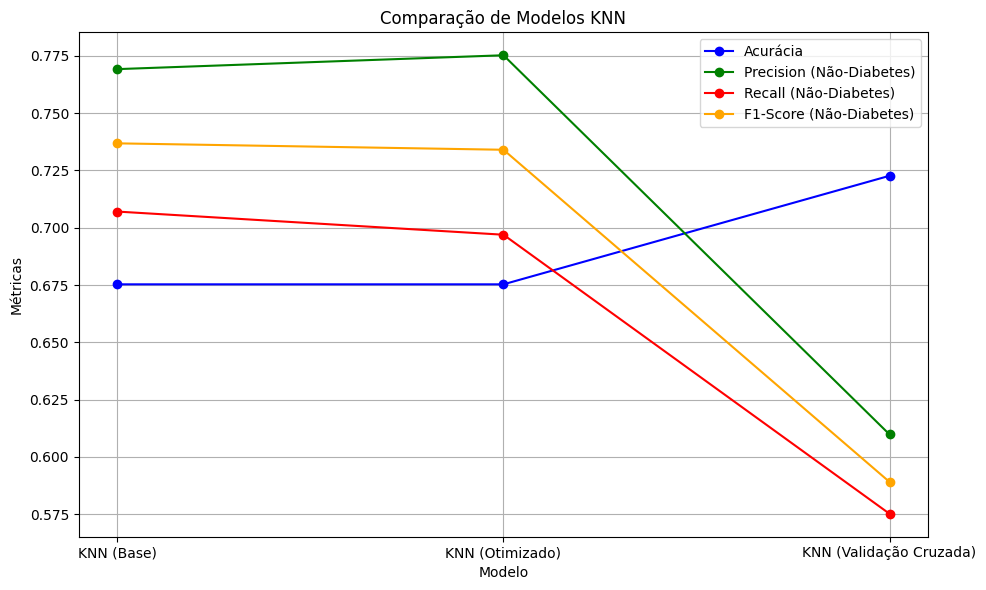

In [ ]:
# Organize the results
results = {
    'Modelo': ['KNN (Base)', 'KNN (Otimizado)', 'KNN (Validação Cruzada)'],
    'Acurácia': [accuracy_knn_base, accuracy_knn_optimized, mean_accuracy_cv],
    'Precision (Não-Diabetes)': [report_base['0']['precision'], report_optimized['0']['precision'], mean_precision_cv],
    'Recall (Não-Diabetes)': [report_base['0']['recall'], report_optimized['0']['recall'], mean_recall_cv],
    'F1-Score (Não-Diabetes)': [report_base['0']['f1-score'], report_optimized['0']['f1-score'], mean_f1_cv],
    'Precision (Diabetes)': [report_base['1']['precision'], report_optimized['1']['precision'], mean_precision_cv],
    'Recall (Diabetes)': [report_base['1']['recall'], report_optimized['1']['recall'], mean_recall_cv],
    'F1-Score (Diabetes)': [report_base['1']['f1-score'], report_optimized['1']['f1-score'], mean_f1_cv],
}

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

import matplotlib.pyplot as plt

# Comparison Chart
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(results_df['Modelo'], results_df['Acurácia'], label='Acurácia', marker='o', linestyle='-', color='b')
ax.plot(results_df['Modelo'], results_df['Precision (Não-Diabetes)'], label='Precision (Não-Diabetes)', marker='o', linestyle='-', color='g')
ax.plot(results_df['Modelo'], results_df['Recall (Não-Diabetes)'], label='Recall (Não-Diabetes)', marker='o', linestyle='-', color='r')
ax.plot(results_df['Modelo'], results_df['F1-Score (Não-Diabetes)'], label='F1-Score (Não-Diabetes)', marker='o', linestyle='-', color='orange')

plt.title('Comparação de Modelos KNN')
plt.xlabel('Modelo')
plt.ylabel('Métricas')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
